# Regressão Linear - Projeto

Parabéns! Você obteve algum contrato de trabalho com uma empresa de comércio eletrônico com sede na cidade de Nova York que vende roupas online, mas também tem sessões de consultoria em estilo e vestuário na loja. Os clientes entram na loja, têm sessões / reuniões com um estilista pessoal, então podem ir para casa e encomendarem em um aplicativo móvel ou site para a roupa que desejam.

A empresa está tentando decidir se deve concentrar seus esforços em sua experiência em aplicativos móveis ou em seu site. Eles contrataram você no contrato para ajudá-los a descobrir isso! Vamos começar!

Basta seguir as etapas abaixo para analisar os dados do cliente (é falso, não se preocupe, eu não lhe dei números reais de cartões de crédito ou e-mails).

In [1]:
# Começo importando as bibliotecas necessarias.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
# Importar os dados
clientes = pd.read_csv("Ecommerce Customers")

In [3]:
# Vamos verificar os dados.

clientes.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
clientes.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Análise Exploratória

#### Vou utilizar somente os dados númericos do dataset. Vou começar utilizando um Jointplot para comparar as colunas Time On Website e Yearly Amount Spent.

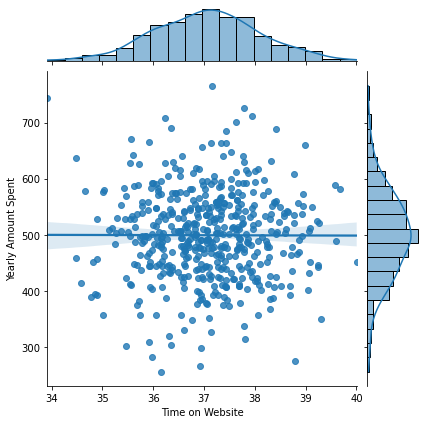

In [6]:
sns.jointplot(x="Time on Website", y="Yearly Amount Spent", data=clientes, kind="reg")

#### A partir de uma visualização da distribuição percebemos que visivelmente não se aparenta haver uma correlação, vamos verificar melhor.

In [7]:
clientes.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


#### A partir da verificação da correlação é evidenciado que não há esse correlação entre as colunas destacadas anteriormente, é perceptível também que há uma forte correlação entre o tempo de filiação (Length of Membership) e a quantidade anual gasta (Yearly Amount Spent).

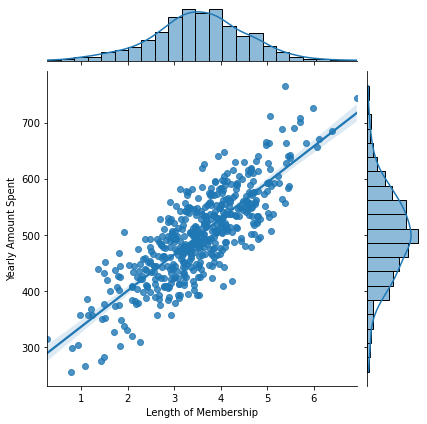

In [8]:
sns.jointplot(x="Length of Membership", y="Yearly Amount Spent", data=clientes, kind="reg")

# Treinando e testando os dados.

#### Sabendo agora a relevância das variáveis vou treinar o modelo de regressão. Vou separar em X as variáveis númericas com exceção da nossa varável alvo e em Y a nossa variável alvo.

In [9]:
X = clientes[["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"]]

In [10]:
y = clientes["Yearly Amount Spent"]

#### Da biblioteca Sklearn vou utilizar o  model_selection.train_test_split para dividir os dados em conjuntos de treinamento e teste.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Treinando o modelo.

#### Da biblioteca Sklearn vou utilizar o linear_model.LinearRegression para treinar o modelo o qual vou chamar de lm.

In [12]:
lm = LinearRegression()

#### Treinar o lm nos dados de treinamento.

In [13]:
lm.fit(X_train, y_train)

LinearRegression()

#### Verificar os coeficientes do treinamento.

In [14]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

# Previsão dos dados de teste.

#### Agora que o modelo está treinado vamos avaliar ele nos nossos dados de teste. Vou usar o lm.predict () para prever o conjunto X_test dos dados.

In [15]:
prediction = lm.predict(X_test)

#### Através de um Scatterplot vou verificar os dados previstos com os valores reais.

Text(0, 0.5, 'Predicted Y')

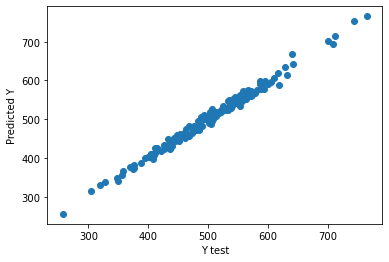

In [16]:
plt.scatter(y_test, prediction)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

#### Quanto mais reta a nossa linha menor o erro. Mas pra uma verificação mais correta vou verificar o MAE, MSE e RMSE, importados do sklearn.metrics.

# Avaliação do modelo

In [17]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 7.228148653430817
MSE: 79.81305165097412
RMSE: 8.933815066978616


#### Com um valor pequeno de RMSE e com pouca diferença do MAE deduzimos que o nosso modelo está tendo uma boa acurácia.

# Conclusão

#### Para uma resposta a nossa pergunta inicial vou apresentar em uma tabela os coeficientes obtidos.

In [23]:
coef = pd.DataFrame(lm.coef_, X.columns, columns=['Coefs']).sort_values(by='Coefs', ascending=False)
coef

,Coefs
Length of Membership,61.279097
Time on App,38.590159
Avg. Session Length,25.981550
Time on Website,0.190405


#### Com a análise desta tabela identificamos que a empresa deveria concentrar seus esforços no aplicativo móvel, pois ele trará um maior retorno comparado com o acesso pelo site, é percebido também que o tempo como membro é o principal fator a contribuir para a renda da empresa.